In [2]:
import os
import requests
import pandas as pd
import numpy as np 

from MCForecastTools import MCSimulation


import seaborn as sns
import json

%matplotlib inline

In [3]:
my_cwn = 100 
my_dmp = 100
my_hvn = 100
my_pmv = 100

In [4]:
# import yfinance data
import yfinance as yf

In [12]:
data_df = yf.download(tickers = ['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'],period = "7d", interval = "1h")

[*********************100%***********************]  4 of 4 completed


In [17]:
data_df = data_df[["Close","Volume"]]
data_df
dataclose_df = data_df["Close"].copy()
dataclose_df
#datavol_df = data_df["Volume"].copy()
#datavol_df

Close                                Volume  \
                           CWN.AX     DMP.AX HVN.AX     PMV.AX   CWN.AX   
2022-03-28 10:00:00+11:00  12.600  81.639999  5.560  28.879999        0   
2022-03-28 11:00:00+11:00  12.600  81.470001  5.590  29.010000   625883   
2022-03-28 12:00:00+11:00  12.600  81.199997  5.575  29.000000  1095319   
2022-03-28 13:00:00+11:00  12.600  80.510002  5.570  28.820000  1975119   
2022-03-28 14:00:00+11:00  12.610  80.820000  5.550  28.740000   313712   
2022-03-28 15:00:00+11:00  12.600  80.660004  5.550  28.490000   395972   
2022-03-28 16:00:00+11:00  12.600  80.500000  5.540  28.459999   519784   
2022-03-29 10:00:00+11:00  12.735  83.169998  5.575  28.379999        0   
2022-03-29 11:00:00+11:00  12.735  83.570000  5.590  28.270000   178946   
2022-03-29 12:00:00+11:00  12.725  83.820000  5.615  28.549999   610026   
2022-03-29 13:00:00+11:00  12.740  83.440002  5.600  28.440001    75814   
2022-03-29 14:00:00+11:00  12.730  83.349998  5.615  28.389999   554421   
2022-03-29 15:00:00+11:00  12.720  83.040001  5.630  28.360001   130561   
2022-03-29 16:00:00+11:00  12.710  82.919998  5.610  28.320000   703531   
2022-03-30 10:00:00+11:00  12.740  84.320000  5.700  28.809999        0   
2022-03-30 11:00:00+11:00  12.750  85.779999  5.710  28.219999  2844042   
2022-03-30 12:00:00+11:00  12.750  86.400002  5.700  28.200001  1621495   
2022-03-30 13:00:00+11:00  12.750  86.309998  5.680  28.125000  1201602   
2022-03-30 14:00:00+11:00  12.730  87.209999  5.710  28.379999   682687   
2022-03-30 15:00:00+11:00  12.760  87.669998  5.710  28.709999  1958618   
2022-03-30 16:00:00+11:00  12.740  87.690002  5.710  28.680000  1689474   
2022-03-31 10:00:00+11:00  12.780  88.190002  5.420  28.230000        0   
2022-03-31 11:00:00+11:00  12.770  89.305000  5.410  28.280001   140007   
2022-03-31 12:00:00+11:00  12.770  89.309998  5.395  28.080000  1592936   
2022-03-31 13:00:00+11:00  12.765  88.959999  5.390  27.950001   516683   
2022-03-31 14:00:00+11:00  12.760  88.845001  5.370  27.959999   522008   
2022-03-31 15:00:00+11:00  12.750  88.129997  5.360  27.590000  3374079   
2022-03-31 16:00:00+11:00  12.760  87.849998  5.350  27.500000   828651   
2022-04-01 10:00:00+11:00  12.760  85.559998  5.280  26.740000        0   
2022-04-01 11:00:00+11:00  12.765  85.300003  5.290  26.639999   143473   
2022-04-01 12:00:00+11:00  12.770  84.559998  5.260  26.480000  1266560   
2022-04-01 13:00:00+11:00  12.775  84.730003  5.230  26.459999   627307   
2022-04-01 14:00:00+11:00  12.790  84.910004  5.210  26.830000   250825   
2022-04-01 15:00:00+11:00  12.785  84.559998  5.210  26.900000   845679   
2022-04-04 10:00:00+10:00  12.780  83.980003  5.220  27.070000        0   
2022-04-04 11:00:00+10:00  12.770  83.900002  5.220  27.299999   892053   
2022-04-04 12:00:00+10:00  12.780  83.589996  5.240  27.180000   442460   
2022-04-04 13:00:00+10:00  12.790  83.550003  5.260  27.240000   166077   
2022-04-04 14:00:00+10:00  12.780  83.550003  5.230  27.270000   588314   
2022-04-04 15:00:00+10:00  12.800  83.209999  5.170  27.120001   246877   
2022-04-04 16:00:00+10:00  12.790  82.809998  5.200  27.170000   272732   
2022-04-05 10:00:00+10:00  12.850  83.260002  5.200  27.240000        0   
2022-04-05 11:00:00+10:00  12.830  81.925003  5.215  27.570000   900708   
2022-04-05 12:00:00+10:00  12.830  82.019997  5.220  27.680000   159720   
2022-04-05 13:00:00+10:00  12.830  82.889999  5.210  27.639999    61808   
2022-04-05 14:00:00+10:00  12.840  82.500000  5.170  27.129999   604147   
2022-04-05 15:00:00+10:00  12.840  82.470001  5.160  27.100000   357830   

                                                    
                           DMP.AX   HVN.AX  PMV.AX  
2022-03-28 10:00:00+11:00       0        0       0  
2022-03-28 11:00:00+11:00   32392   510228   14522  
2022-03-28 12:00:00+11:00   36106   347287   15684  
2022-03-28 13:00:00+11:00   22472   211988   15200  
2022-03-28 14:00:00+11:00   23654 

In [9]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    period = "7d"
    interval = "1h"
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df


In [10]:
#tickers = ["CWN", "DMP", "HVN", "PMV"]

In [11]:
#aussharedata = read_data(['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'], "2022-03-25","2022-04-01")

[*********************100%***********************]  4 of 4 completed


In [18]:
#aussharedata = yf.download('CWN.AX DMP.AX HVN.AX PMV.AX', start="2022-03-25", end="2022-04-01")
dataclose_df = dataclose_df.dropna()
dataclose_df.head(6)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-28 10:00:00+11:00,12.60,81.639999,5.560,28.879999
2022-03-28 11:00:00+11:00,12.60,81.470001,5.590,29.010000
2022-03-28 12:00:00+11:00,12.60,81.199997,5.575,29.000000
2022-03-28 13:00:00+11:00,12.60,80.510002,5.570,28.820000
2022-03-28 14:00:00+11:00,12.61,80.820000,5.550,28.740000
2022-03-28 15:00:00+11:00,12.60,80.660004,5.550,28.490000


In [19]:
dataclosestd_df = dataclose_df.std()
dataclosestd_df.head()

CWN.AX    0.068982
DMP.AX    2.518492
HVN.AX    0.194099
PMV.AX    0.736910
dtype: float64

In [20]:
correlation = dataclose_df.corr()
correlation

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
CWN.AX,1.000000,0.375456,-0.617141,-0.686810
DMP.AX,0.375456,1.000000,0.074907,-0.095115
HVN.AX,-0.617141,0.074907,1.000000,0.854742
PMV.AX,-0.686810,-0.095115,0.854742,1.000000


<AxesSubplot:>

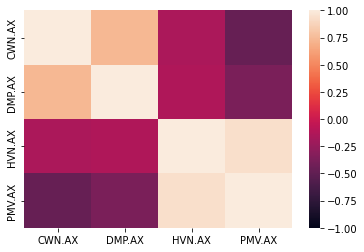

In [130]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [29]:
datareturns_df = dataclose_df.pct_change().copy()
datareturns_df.head(12)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-04-04 11:00:00+10:00,-0.000782,-0.000953,0.000000,0.008496
2022-04-04 12:00:00+10:00,0.000783,-0.003695,0.003831,-0.004396
2022-04-04 13:00:00+10:00,0.000782,-0.000478,0.003817,0.002207
2022-04-04 14:00:00+10:00,-0.000782,0.000000,-0.005703,0.001101
2022-04-04 15:00:00+10:00,0.001565,-0.004069,-0.011472,-0.005501
2022-04-04 16:00:00+10:00,-0.000781,-0.004807,0.005803,0.001844
2022-04-05 10:00:00+10:00,0.004691,0.005434,0.000000,0.002576
2022-04-05 11:00:00+10:00,-0.001556,-0.016034,0.002885,0.012115
2022-04-05 12:00:00+10:00,0.000000,0.001160,0.000959,0.003990
2022-04-05 13:00:00+10:00,0.000000,0.010607,-0.001916,-0.001445


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

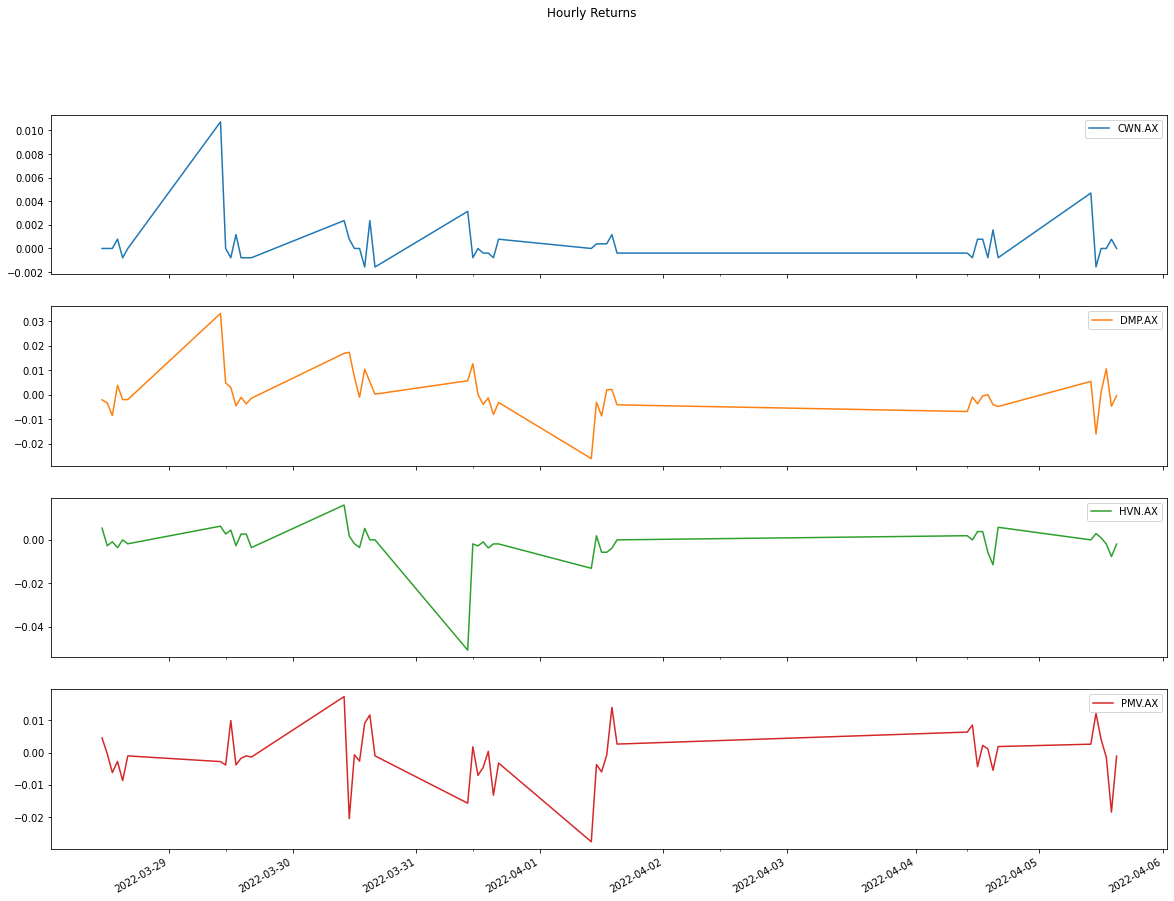

In [22]:
datareturns_df.plot(subplots=True,figsize=(20, 15), title="Hourly Returns")
#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}>

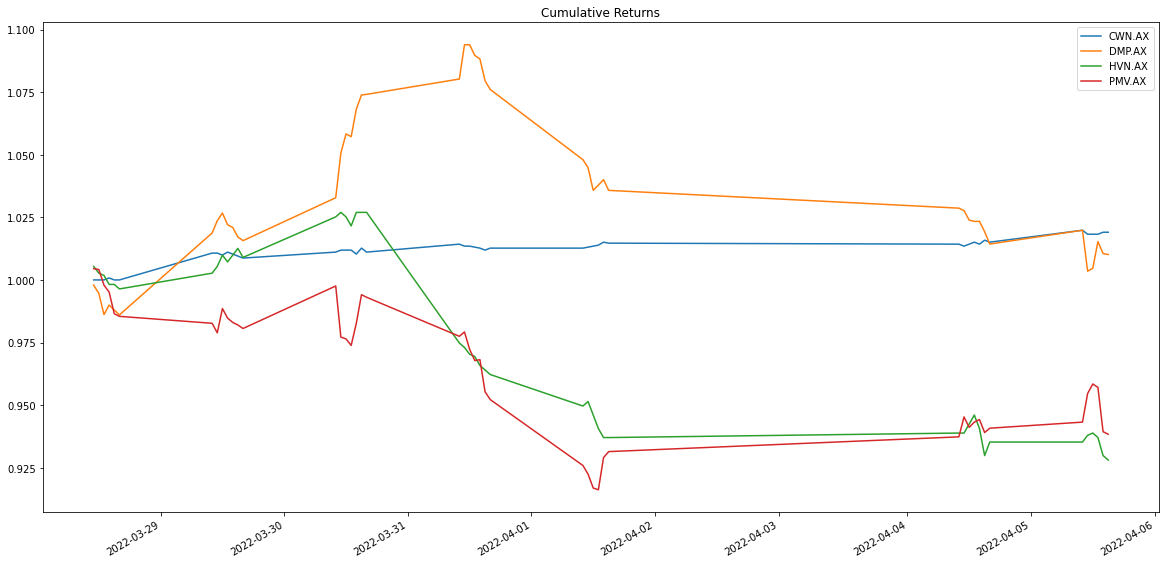

In [23]:
cumulative_returns = (1 + datareturns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

<AxesSubplot:title={'center':'Log Returns'}>

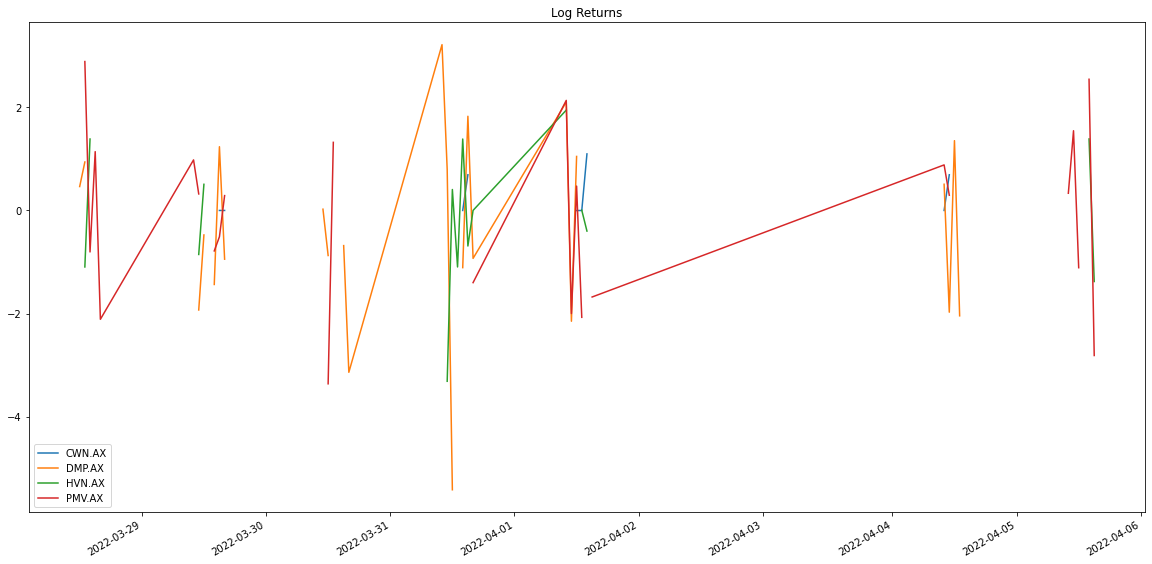

In [28]:
log_ret = np.log(datareturns_df/datareturns_df.shift(1))
log_ret.plot(figsize=(20, 10), title="Log Returns")